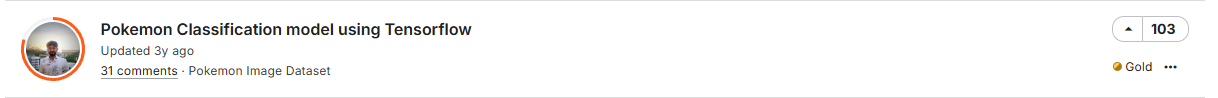

In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import pathlib
import matplotlib.pyplot as plt

This is the list of all the files present in the path given to us:

['abomasnow.png', 'abra.png', 'absol.png', 'accelgor.png', 'aegislash-blade.png', 'aerodactyl.png', 'aggron.png', 'aipom.png', 'alakazam.png', 'alomomola.png', 'altaria.png', 'amaura.png', 'ambipom.png', 'amoonguss.png', 'ampharos.png', 'anorith.png', 'araquanid.png', 'arbok.png', 'arcanine.png', 'arceus.png', 'archen.png', 'archeops.png', 'ariados.png', 'armaldo.png', 'aromatisse.png', 'aron.png', 'articuno.png', 'audino.png', 'aurorus.png', 'avalugg.png', 'axew.png', 'azelf.png', 'azumarill.png', 'azurill.png', 'bagon.png', 'baltoy.png', 'banette.png', 'barbaracle.png', 'barboach.png', 'basculin-red-striped.png', 'bastiodon.png', 'bayleef.png', 'beartic.png', 'beautifly.png', 'beedrill.png', 'beheeyem.png', 'beldum.png', 'bellossom.png', 'bellsprout.png', 'bergmite.png', 'bewear.png', 'bibarel.png', 'bidoof.png', 'binacle.png', 'bisharp.png', 'blacephalon.png', 'blastoise.png', 'blaziken.png', 'blissey.png', 'blitzle

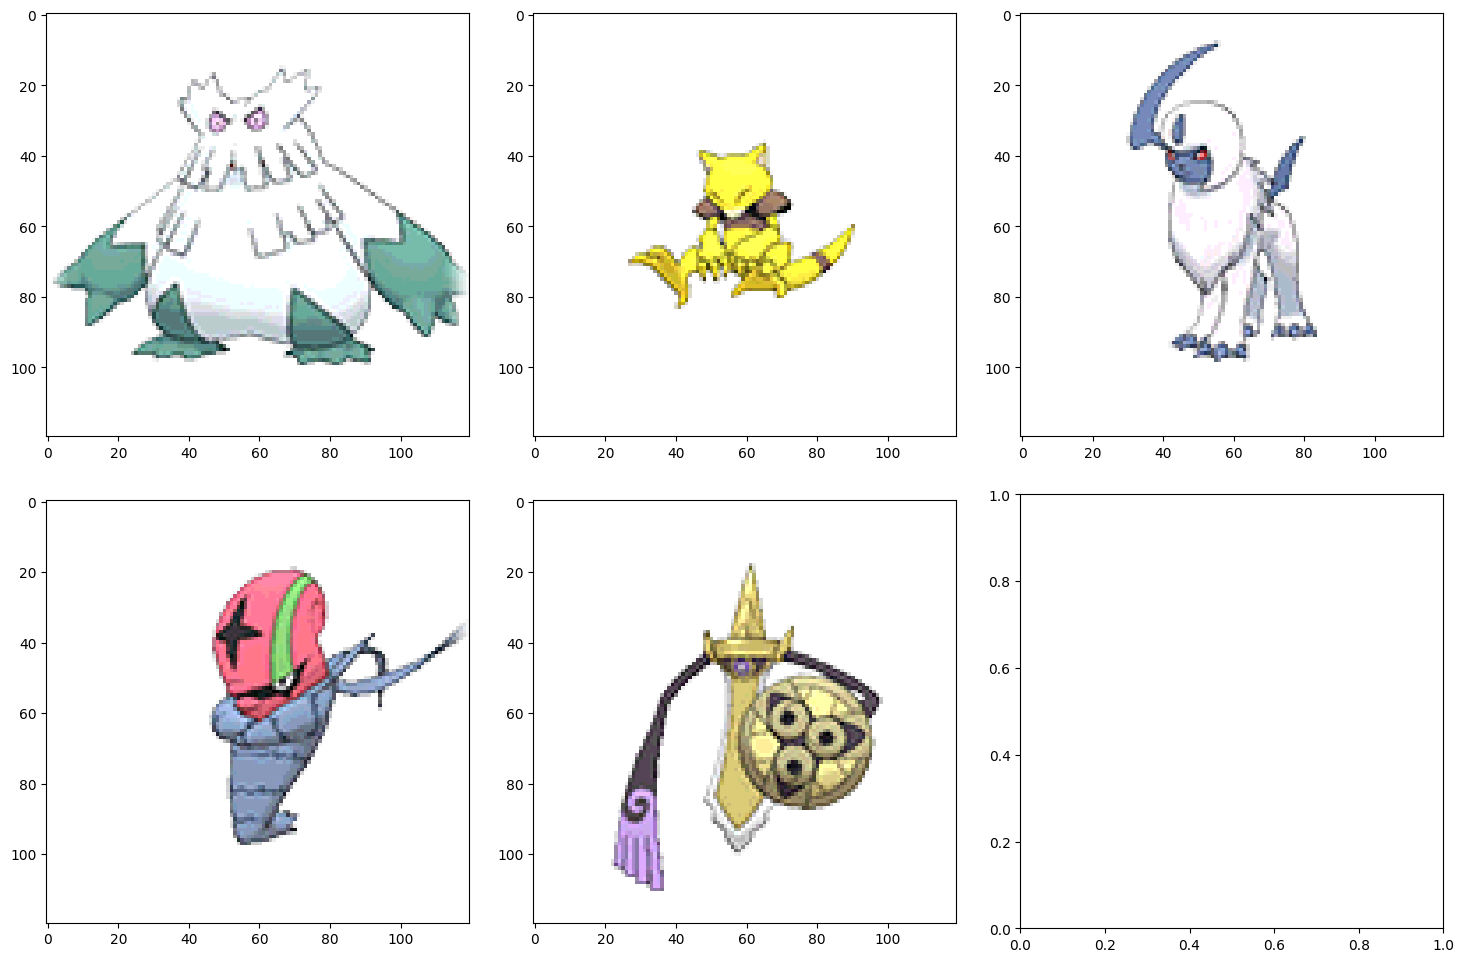

In [4]:
from PIL import Image

data_dir = r"D:\code_study\ML_CODE\dataSets\Pokemon_Image_Dataset\images"
data_dir = pathlib.Path(data_dir)

fileNames = os.listdir(data_dir)
print("This is the list of all the files present in the path given to us:\n")
print(fileNames)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
first_five = fileNames[:5]

def subplots():
    i = 0
    j = 0
    k = 0

    for k in range(5):
        state = os.path.join(data_dir, first_five[k])
        img = Image.open(state)
        axes[i, j].imshow(img)

        if k==2:
            i += 1
            j = 0
        else:
            j += 1

    plt.tight_layout(pad=2)

subplots()

In [6]:
## Run the below cells as it is
data = pd.read_csv(r"D:\code_study\ML_CODE\dataSets\Pokemon_Image_Dataset\pokemon.csv")

data.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [7]:
## Run the below cells as it is
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [8]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [9]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [15]:
final_images = []
final_labels = []
count = 0
files = os.path.join(data_dir)

for file in fileNames:
    count += 1
    img = cv2.imread(os.path.join(data_dir, file), cv2.COLOR_BGR2GRAY)
    label = labels_idx[data_dict[file.split(".")[0]]]

    final_images.append(img)
    final_labels.append(np.array([label]))

print(len(final_labels))
final_images = np.array(final_images, dtype=np.float32) / 255.0
final_labels = np.array(final_labels, dtype=np.int8).reshape(809, 1)


809


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 43200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               4320100   
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 18)                1818      
Total params: 4,342,118
Trainable params: 4,342,118
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

history = model.fit(final_images, final_labels, epochs=50)

Epoch 1/50
26/26 [==============================] - 1s 4ms/step - loss: 2.9806 - accuracy: 0.0965
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 2.4878 - accuracy: 0.2373
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 2.1694 - accuracy: 0.3031
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 1.9213 - accuracy: 0.3791
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 1.5959 - accuracy: 0.5112
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 1.3376 - accuracy: 0.6153
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 1.0649 - accuracy: 0.6862
Epoch 8/50
26/26 [==============================] - 0s 4ms/step - loss: 0.8345 - accuracy: 0.7541
Epoch 9/50
26/26 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.7968
Epoch 10/50
26/26 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.8607
Epoch 11/50
26/26 [

In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

print("\n",predictions[0])
id = np.argmax(predictions[0])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id,labels[id]))
print("accuracy of the model",history.history['accuracy'][-1])


 [9.9999940e-01 3.2705745e-24 3.2500100e-09 3.0659155e-21 9.3153159e-12
 1.5505362e-17 5.5527545e-07 3.6228081e-16 1.1058093e-23 1.3646604e-21
 8.5552976e-26 5.3867338e-17 2.2675576e-20 6.0911033e-18 1.6812402e-13
 6.2555799e-20 1.5023272e-09 2.6153135e-21]

id that we got from the model as prediction: 0
Type of pokemon associted with that id: Grass 
accuracy of the model 1.0
